<a href="https://colab.research.google.com/github/stepsbtw/Machine-Learning/blob/main/notebooks/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

Técnica de redução de dimensionalidade bastante usada. Seu objetivo principal é transformar um dataset em um espaço com menos dimensões, preservando ao máximo a **variância dos dados** (informação).

## Intuição
PCA encontra novos eixos (bases) chamadas Componentes Principais, e elas são:

1. **Ortogonais** (Não Correlacionadas).
2. **Ordenadas** pela quantidade de variância capturada.

**Projetamos** os dados nessas primeiras **k** componentes, podemos obter uma representação sub-dimensional que ainda retém as features mais informativas!

## Por que usar o PCA?

- **Simplifica** Modelos
- Remove features **correlatas**
- Visualização de dados de alta dimensão em (2D ou 3D)
- Acelera algoritmos de machine learning
- Diminui o **ruído** (noise) dos dados.

## Como funciona?

Dado um Dataset $X ∈ ℝ^{m x d}$ :

1. Padronizar (Centralizar e Normalizar) a matriz $X$

$$
X = \frac{X - μ}{σ}
$$

2. Computar $Σ$, a matriz de **covariância** da matriz $X$:

$$
Σ = \frac{1}{m-1} ∑^m_{i=i}(x^{(i)}x^{(i)^T})
$$

3. Decompor $Σ$ usando SVD (Singular Variable Decomposition): $$Σ = USV^T$$

4. Selecionar as $k$ colunas de $U$ correspondendo aos $k$ maiores valores singulares de $S$. Essas são as $k$ componentes principais.

5. Contruir a Matriz de Projeção: $W = [u_1,u_2,...,u_k]$

6. Projetar os dados sobre a base formada de $U$: $X_{proj} = XW$

## Cuidado!
- O PCA é **linear** : Não é capaz de capturar padrões não-lineares. Pra isso, tente UMAP ou t-SNE.
- As componentes principais são **difíceis de interpretar**: São combinações das features originais
- É **sensível ao scaling das Features**

# Decomposição SVD

Entender como o SVD encontra essas direções ajuda a desmistificar o PCA (Algebra Linear).

Dado uma matriz de dados **centralizada** $X∈ℝ^{nxd}$ (n samples e d features):

$$
X = UΣV^T
$$

Onde:
- $ U ∈ ℝ^{mxm}$: Vetores singulares à esquerda (Direções no espaço de dados)
- $ Σ ∈ ℝ^{mxd}$: Matriz diagonal dos **valores singulares** $σ_1 \geq σ_2 \geq {...}$
- $V^T ∈ ℝ^{dxd}$: Vetores singulares à direita (Direções no espaço de **features**)

Entender o SVD geométricamente é realizar que ele **rotaciona e estica** o espaço:
$$ \text{Cada } v_i \text{ (coluna de V) da uma direcao de variancia maxima}$$


## Como?

Digamos que queremos $v$ que **captura o máximo de variância** ao projetar os dados.

## Vetor Média

Dada matriz $\mathbf{X}$:

$$
\mathbf{X} = {\begin{bmatrix}\mathbf{x}^{(1)}\\\vdots\\\mathbf{x}^{(m)}\end{bmatrix}}^T = {\begin{bmatrix} (\mathbf{x}^{(1)})^T\\\vdots\\(\mathbf{x}^{(m)})^T \end{bmatrix}}
$$

Denotamos a entrada na i-ésima linha e j-ésima coluna de $\mathbf{X}$ como: $x^{(i)}_j$.

Definimos $μ_j$, a média da j-ésima coluna (feature).

Podemos então chamar $μ$ o vetor contendo a média de cada coluna.

$$
μ = \frac{1}{m}∑^m_{i=1}x^{(i)} = {\begin{bmatrix}μ_1\\\vdots\\μ_j\\μ_n\end{bmatrix}}
$$

- Então, uma matriz é dita **centralizada** quando se diminui o vetor média.

In [1]:
import numpy as np

X = np.array([[0,0],[1/2,1/2],[0,1],[1,0],[1,1]])
print('Original data matrix:\n', X)

X_centered = X - X.mean(axis=0)
print('Centered data matrix:\n', X_centered)

Original data matrix:
 [[0.  0. ]
 [0.5 0.5]
 [0.  1. ]
 [1.  0. ]
 [1.  1. ]]
Centered data matrix:
 [[-0.5 -0.5]
 [ 0.   0. ]
 [-0.5  0.5]
 [ 0.5 -0.5]
 [ 0.5  0.5]]


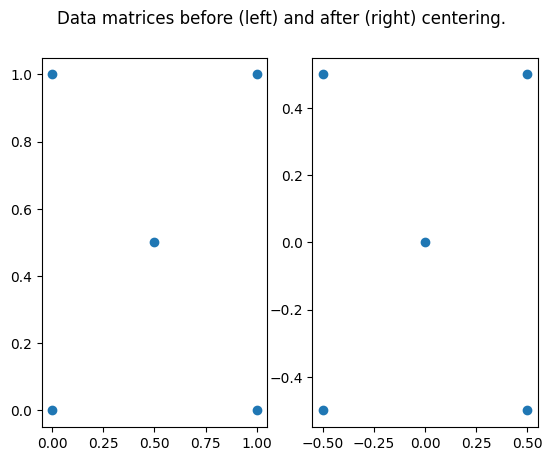

In [2]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Data matrices before (left) and after (right) centering.')

# plot data
ax1.scatter(X[:, 0], X[:, 1])
ax2.scatter(X_centered[:, 0], X_centered[:, 1])

## Variância e Covariância
Dadas duas variáveis aleatórias $x$ e $y$, a covariância é:

$$
cov(x,y) = Ε[(x-μ_x)(y-μ_y)] = Ε[xy] - μ_x - μ_y
$$

No contexto de uma matriz de dados, a covariância mede a relação **linear** entre um par de features.

- A covariância de uma variável com ela mesma é simplesmente sua variância. Isso nos dá uma noção de **dispersão** dos valores em torno da média.

## Matriz de Covariância
$$Σ_{jk} = cov(x_j, x_k)$$

A matriz é simétrica com a diagonal principal, a $cov(x_j,x_k) = cov(x_k,x_j)$.

A diagonal principal são as variâncias das $n$ features.

- **Em machine learning, estaremos estimando a matriz de covariância**

$$Σ_{jk}=  \frac{1}{m-1}∑^m_{i=1}(x_j^{(i)}-μ_j)(x^{(i)}_k - μ_k)$$

Podemos expressar a matriz de forma **VETORIZADA** (X centralizado).

$$Σ = \frac{1}{m-1}X^TX$$

In [14]:
# matriz de dados
X = np.array([[0, 2], [1, 1], [2, 0]])
m = 3
print(X)

# centralizacao
X_centered = X - X.mean(axis=0)

print("centered: ")
print(X_centered)

print("covariance matrix: ")
temp = X_centered.T.dot(X_centered)
temp = temp / (m-1)
print(temp)

from sklearn.covariance import EmpiricalCovariance
cov = EmpiricalCovariance().fit(temp)

print("Estimate of the cov matrix:\n",cov.covariance_)

[[0 2]
 [1 1]
 [2 0]]
centered: 
[[-1.  1.]
 [ 0.  0.]
 [ 1. -1.]]
covariance matrix: 
[[ 1. -1.]
 [-1.  1.]]
Estimate of the cov matrix:
 [[ 1. -1.]
 [-1.  1.]]


# Demonstração

Considere duas variaveis normalmente distribuídas:

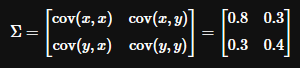

Vamos criar uma amostras com 500 pares dessas duas variáveis normalmente distribuídas. O resultado é uma matriz de dados com n=2 features, m = 500 exemplos. No plot gerado, note como as duas variáveis estão correlacionadas positivamente.

Vamos gerar a aproximação com a `EmpiricalCovariance` class

In [10]:
import numpy as np

# matriz de covariancia real
real_cov = np.array([[.8, .3],
                     [.3, .4]])

real_cov

array([[0.8, 0.3],
       [0.3, 0.4]])

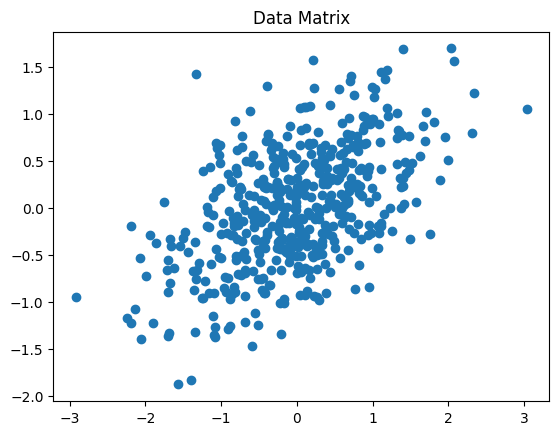

Estimate of the cov matrix:
 [[0.73915356 0.28184567]
 [0.28184567 0.39246055]]

Estimate of the mean vector:
 [-0.01120768  0.01346181]


In [13]:
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance

# gerar os dados apartir dessas covariancias
rng = np.random.RandomState(42)
X = rng.multivariate_normal(mean=[0,0], cov=real_cov, size=500)

# estimar a covariancia
cov = EmpiricalCovariance().fit(X)

plt.title('Data Matrix')
plt.scatter(X[:,0], X[:,1])
plt.show()

print("Estimate of the cov matrix:\n", cov.covariance_)
print()
print("Estimate of the mean vector:\n", cov.location_)

# Principal Component Analysis

Algoritmo de redução de dimensionalidade **não-supervisionado**.

Matemáticamente, é uma transformação **linear** ortogonal que representa os dados da matrix $X$ em um novo sistema de coordenadas, para que a **maior variância** fique na primeira coordenada (primeira **principal componente**), e assim em diante.

### Erro de projeção
O novo sistema produzido visa minimizar o **Projection Error** nesse espaço com dimensionalidade menor.

Matemáticamente, o erro de projeção é a **soma dos quadrados das distâncias** entre cada ponto de dados e a superficie correspondente ao menor espaço dimensional onde os dados serão projetados.

### Exemplo: 2D -> 1D

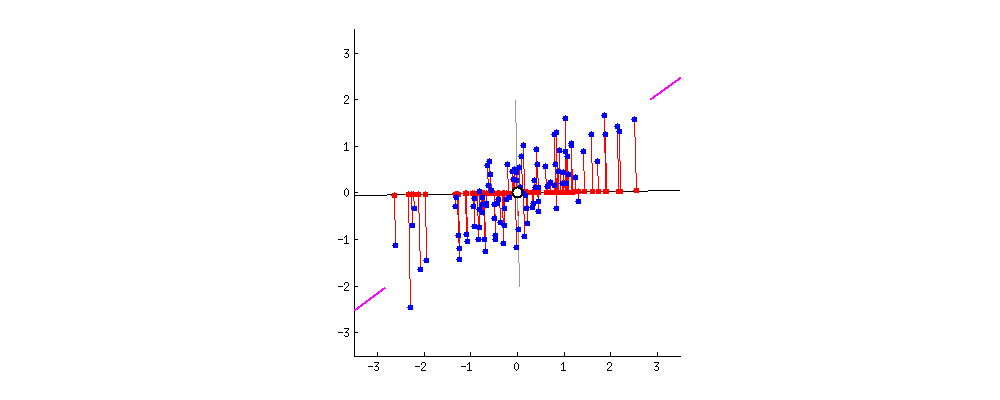

Portanto, a ideia é encontrar **k** vetores (k dimensoes no reduzido) onde podemos projetar os dados enquanto minimizando o erro de projeção.

### Pre-Processing
É necessário a centralização e scaling dos dados.

# Passo a Passo

1. Computar $Σ$ de $X$:
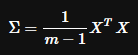

2. Computar a decomposição SVD de Σ:
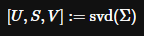

A partir dessa decomposição, **a matriz relevante para o PCA é $U$ ∈ $R^nxn$**.
- As colunas de $U$ formam uma base **ortonormal** para $R^n$, além disso, as primeiras $k$ colunas de $U$ irão corresponder as *componentes principais* do PCA.

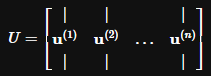

Após identificar as principais componentes, é possivel reduzir a dimensionalidade de $n$ para $k$ dimensões, projetando no hiperplano definido pelas primeiras $k$ componentes principais. Assim a projeção irá preservar a maior variância possível. Considere a matriz $U_{redux}$:

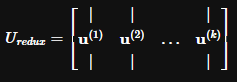

Então para mapear $x^{(i)} ∈ R^n$ para $z^{(i)} ∈ R^k$:

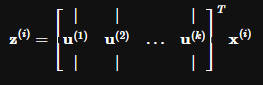

# Usando o SCIKIT LEARN:

A classe sklearn.decomposition.PCA implementa o PCA. Essa classe projeta o ponto na matriz de dados sobre um espaco dimensional menor. A matriz é centralizada, mas seus atributos não são escalados, antes de aplicar o SVD.

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

Ao invés de especificar o número de componentes principais a serem preservados, é possível definir `n_components` como entre (0.0, 1.0) -> Indicando a proporção da variância a ser mantida.

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

Após aplicar a transformação em $X$, os componentes principais são armazenados na variável `components_`. A variável contem as PC's em vetores **horizontais**.

Então, por exemplo, a primeira componente principal é `pca.components_.T[:, 0]`.

## Exemplo:

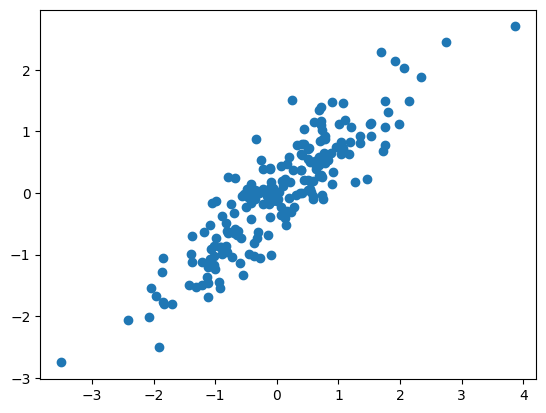

In [19]:
import matplotlib.pyplot as plt

# gerando a matriz de dados (2,200) com 2 features
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Claramente existe uma correlação positiva entre as duas features. Aumentar uma aumenta a outra.

Podemos inspecionar a matriz de covariância para confirmar.

In [20]:
from sklearn.covariance import EmpiricalCovariance
cov = EmpiricalCovariance().fit(X)
print(cov.covariance_)

[[1.05064217 0.85440225]
 [0.85440225 0.87143631]]


85% de covariância.

Então vamos usar o PCA!

In [22]:
from sklearn.decomposition import PCA

# aqui computamos as componentes principais
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)

[[ 0.74306799  0.66921593]
 [-0.66921593  0.74306799]]


In [23]:
print(pca.explained_variance_) # shap value? (variancia!)

[1.82927343 0.10246373]


In [24]:
# quanto de variancia conseguimos manter na dimensao menor
s = 0.7625315 + 0.0184779
print(0.7625315/s)
print(0.0184779/s)

0.9763410017856379
0.023658998214362077


## Visualização

Podemos visualizar de forma melhor as componentes:

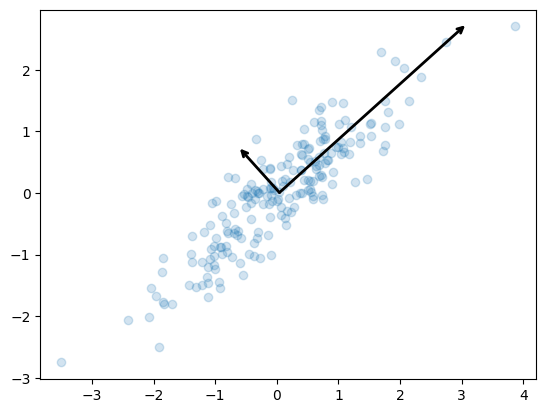

In [25]:
import matplotlib.pyplot as plt
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Nessa visualização, o tamanho do vetor demonstra o quão "importante" esse eixo é na descrição da distribuicao dos dados.

É a medida de variancia dos dados quando projetados naquele eixo.

## Aplicações do PCA

- Redução de memória necessária para o armazenamento de dados.

- Aceleração dos algoritmos de aprendizado: PCA pode ser aplicado para reduzir a dimensionalidade de uma matriz de dados antes de aplicar algum algoritmo de aprendizado. (vai ser melhor por conta de menos features) - Curse of Dimensionality.

- Preview: PCA pode ser usada como uma ferramenta de análise exploratória de dados. Nesse contexto, podemos usar o PCA para reduzir um dataset para 2 ou 3 dimensões e visualmente inspecionar os pontos para tirar insights.

## Encontrar a dimensão Intrínseca

Um procedimento importante ao usar o PCA é estimar quantos componentes principais serão necessários para descrever os dados adequadamente. Essa quantidade é chamada **dimensão intrínseca** do dataset.

Pode ser determinada observando a **variância explicada acumulada** como uma função do número de componentes.

### Exemplo : Digits

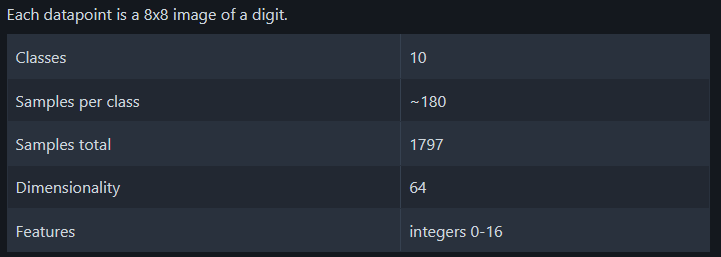

(1797, 64)
(1797, 2)


<ipython-input-29-3190558145>:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('Blues', 10))


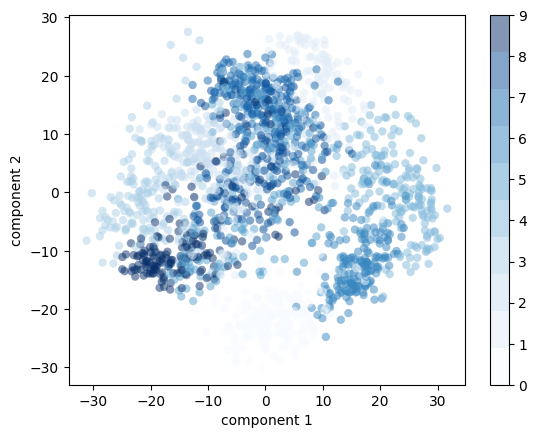

In [29]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

from sklearn.decomposition import PCA

# projetar de 64 dimensões para 2.
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Blues', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

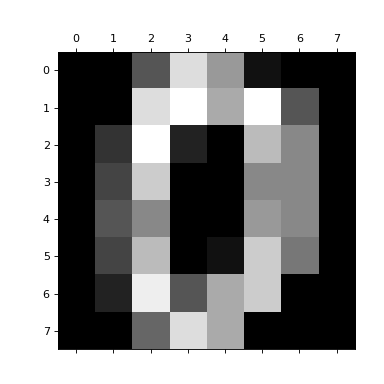

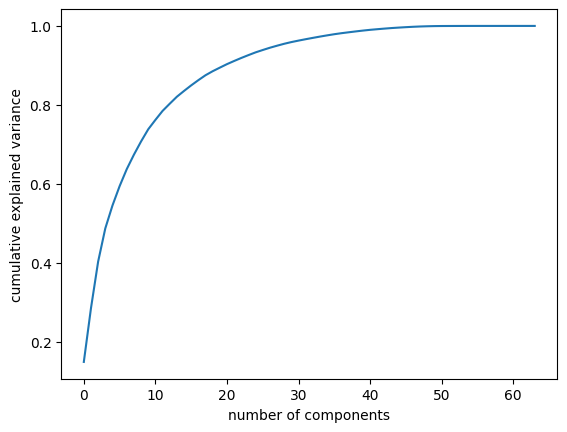

In [31]:
import numpy as np
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Posso entender então que em algum momento, realmente as componentes param de contribuir tanto.

In [32]:
print(pca.explained_variance_)
# MÉTODO DO JOELHO

[1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 1.01835674e-15 6.65432953e-16 0.00000000e+00]


## Considerações Práticas do PCA

- Podemos erroneamente considerar usar o PCA **incondicionalmente**. Mas um approach mais apropriado seria, antes de aplicar o PCA, testar os algoritmos de ML no **data set original**. Caso os resultados sejam **insatisfatórios**, podemos considerar aplicar o PCA.

- Para evitar **data leakage**, a projeção deve ser construída apenas usando o conjunto de treino. Após criar esse mapping, podemos aplicar para o conjunto e validação e teste.

- Uma fraqueza do PCA é que ele é **altamente** sensível a **outliers**. Então é bom fazer uma análise exploratória antes para indenticar dados extremos no dataset.

- Feature Scaling é importante para o PCA correto.

# Estudo de Caso : IRIS

Queremos projetar o dataset IRIS (4D) para um plano (2D).

In [34]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=["sepal length", "sepal width", "petal length", "petal width", "target"])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
from sklearn.preprocessing import StandardScaler

features = ["sepal length", "sepal width", "petal length", "petal width"]
X = df.loc[:, features].values
y = df.loc[:, ["target"]].values

X = StandardScaler().fit_transform(X)

Queremos agora aplicar o PCA para duas dimensoes.

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(X)

principal_df = pd.DataFrame(data=pcs, columns = ["Principal Component 1", "Principal Component 2"])

[2.93035378 0.92740362 0.14834223 0.02074601]


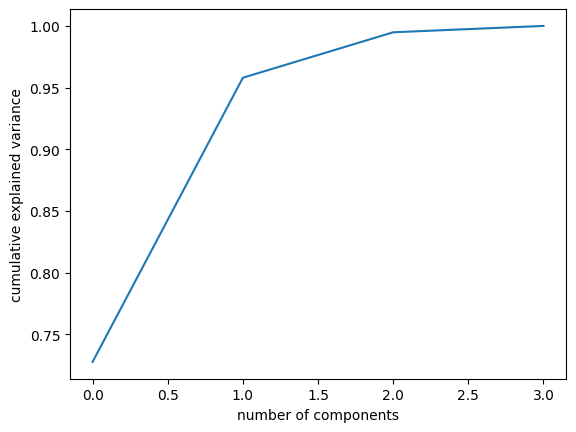

In [41]:
import matplotlib.pyplot as plt
import numpy as np

pca = PCA().fit(X)
print(pca.explained_variance_)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

In [45]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)

Note como as classes estão bem separadas umas das outras.

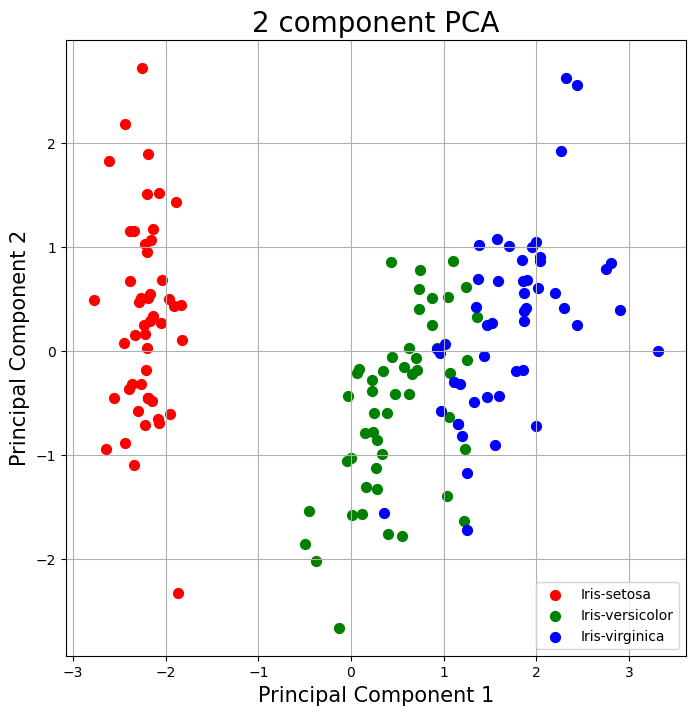

In [46]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = final_df['target'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'Principal Component 1']
               , final_df.loc[indicesToKeep, 'Principal Component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

A `explained_variance_ratio` diz o quanto de informação (variância) pode ser atribuído a cada uma das componentes principais. Ao inspecionar esse vetor, podemos ver que a **primeira componente** contém 72.77% da variância, e a segunda componente principal contém 23.03% da variância.

Juntas formam 95.80% da informação.

In [47]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

In [48]:
# numero de componentes escolhidas pelo pca após ajustado
pca.n_components_

4

# Variantes do PCA

Existem algumas implementações diferentes que o Scikit-Learn possui.

- IncrementalPCA
- RandomizedPCA

# Exemplo : MNIST
Podemos dividir o MNIST em 100 mini-lotes de exemplos, e passá-los para o **IncrementalPCA** para reduzir a dimensionalidade do MNIST para **154 dimensões**. Usando o método `partial_fit()` para cada mini-lote.

Cada PIXEL é uma feature! Então temos 28x28 = 784 DIMENSÕES

In [49]:
from sklearn.decomposition import IncrementalPCA
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True)

print(X_mnist.shape)

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist, n_batches):
        inc_pca.partial_fit(X_batch)
X_mnist_reduced = inc_pca.transform(X_mnist)

print(X_mnist_reduced.shape)

(70000, 784)


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


(70000, 154)


Perceba que, é um dataset bastante volumoso e acaba que o PCA fica bem custoso. (lento)

Também podemos usar o **RandomizedPCA**:

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_mnist)
print(X_mnist_reduced.shape)